<a href="https://colab.research.google.com/github/Kwonjihan/ML-teamproject/blob/developtemp/SeongYeomByeon/Bert_pretraining_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##개요##
- Bookcorpus 데이터셋에서 20000개 텍스트를 추출하여 진행
- 구조 개선의 목적이 학습의 가속화, 즉 동일한 환경에서 더 빨리, 더 작은 Loss로 수렴하는 것이기 때문에 데이터셋 크기는 크게 상관 없다고 생각했음.

##결과(Test Perplexity)##
- 오리지널 모델 / 키워드 스코어 / 임베디드 유사도
- 1차 : 743.0725 / 773.6405 / 829.0847
- 2차 : 813.6715 / 832.9860 / 783.4184
- 3차 : 900.8481 / 802.1566 / 750.9805

-> 테스트 결과는, pretraining task에 쓰기에는 너무 작은 데이터셋에서의 결과이기에 의미가 없다고 생각함. Accuracy를 지표로 사용하지 않은 이유도 동일

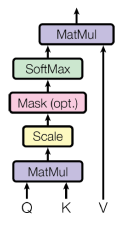

# **[실험 결과]**

- 선형적 상관관계가 보이지 않음.
- '왜?' 실패했을까

# **[공통 요인]**

**1. 데이터셋 크기의 한계**
> - BERT같은 대규모 모델의 Pretraining은 통상적으로 수백만 개의 문서로 구성된 방대한 데이터셋을 필요로 함.
- 본 연구에서는 20000개의 데이터셋을 사용하였으며, 이는 모델이 다양한 패턴과 문맥을 충분히 학습하는 데 불충분함.
-  문맥을 학습하고 일반화하는 데 필요한 충분한 정보를 제공하지 못하여, 애초에 구조 개선의 효과가 반영될 수 없었을지도?

**2. 학습 시간의 부족**
> - BERT 모델은 일반적으로 수십에서 수백 시간의 학습을 통해 높은 성능을 달성함.
- 본 연구에서는 제한된 학습 시간으로 인해 모델이 충분히 학습되지 못했음.
- 구조 개선이 학습 규모에 상관 없이 학습 속도를 가속화하는데 도움이 될거라 생각했지만, 충분한 학습 시간이 주어지지 않은 상태에서 새로운 방법을 적용하는 것 자체가 그 효과를 제대로 평가할 수 없게 만든 것일지도?

# **[아이디어 1: Embedding 유사도 반영]**
**1. 임베딩 유사도 자체의 효과 미미**
>- 상위 레이어에서의 임베딩 유사도 반영은 토큰 간의 유사성을 강조하려는 의도였음.
- 하지만 실제로는 이미 충분히 학습된 토큰 간의 관계를 크게 변화시키지 못함.
- 이로 인해, 임베딩 유사도를 추가하더라도 기존 attention 메커니즘에 비해 의미 있는 성능 향상을 가져오지 못한걸까?

**2. 이미 높은 모델의 완성도**
> - BERT 모델은 원래도 강한 적응력을 가지고 있어, 추가적인 유사도 반영이 없어도 충분히 문맥적 의미를 이미 학습함.
- 그렇기에, 새로운 유사도 행렬을 반영한 것이 이미 반영된 것을 다시 반영하는거라 의미가 없었던 것 같음.

# **[아이디어 2: Keyword Score 반영]**
**1. 키워드 선택 오류**
> - CLS 토큰과의 Similarity를 통해 Keyword Score를 계산하는 방식이, 문맥에 따라 키워드를 잘못 선택한다면?
- 문장의 대표적인 단어가 항상 높은 Similarity를 갖는다는 가정 자체가 틀렸다면,  Keyword Score 의 계산이 부정확한 것이 당연.
**2. CLS 토큰의 한계**
> - CLS 토큰은 문장의 전체적인 맥락을 나타내지만, 이게 무조건 개별 단어의 문맥적 중요도를 정확하게 반영한다는 뜻은 아님.
-  CLS 토큰과의 Similarity를 통해 계산된 Keyword Score가, 단어의 실제 중요도를 반영하는 것이 아닐지도?
**3. 이미 강력한 Attention 메커니즘**
> - Attention 메커니즘은 그 자체로도모든 단어의 중요도를 학습할 수 있는 강력한 능력을 갖추고 있음.
-  이전 아이디어의 예상 실패 요인과 유사하게, Keyword Score를 추가하더라도, 모델이 본래의 Attention 메커니즘을 통해 이미 충분한 성능을 발휘하고 있었기 때문에 추가적인 가중치 적용이 큰 변화를 가져오지 못했던 걸지도?

# **[결론]**
- 본 연구에서는 BERT 모델의 Pretraining 성능을 개선하기 위한 두 가지 아이디어를 제시하고 그 효과를 평가하였음.
- 첫 번째 아이디어는 상위 레이어의 Attention에 Embedding 유사도를 반영하는 것이었고, 두 번째 아이디어는 Attention Score에 Keyword Score를 가중치로 반영하는 것이었음.
- 그러나 실험 결과, 기존 모델과 비교하여 성능 향상의 차이가 거의 없음을 확인할 수 있었음.

- 이러한 결과는 다양한 요인이 종합적으로 작용한 결과라고 생각함.
- 상위 레이어의 Attention에 임베딩 유사도를 반영하는 아이디어는 토큰 간의 문맥적 유사성을 강화하려는 의도였지만, 이미 강력한 적응력을 가진 BERT 모델은 이러한 변경 없이도 충분한 문맥적 의미를 학습할 수 있었을 가능성이 있음.
- 또한, Keyword Score를 가중치로 반영하는 방법 역시 CLS 토큰과의 Similarity로 계산된 Keyword Score가 단어의 실제 중요도를 충분히 반영하지 못하여 성능 향상이 제한적이었을 수 있었다고 생각함.
- 공통적으로도, 제한된 데이터셋 크기와 학습 시간도 우리의 생각보다 학습 동향에 지대한 영향을 미치는 요소일 가능성이 매우 큼.

- 가능하다면, 보다 대규모의 데이터셋과 장기간의 학습 시간을 확보함으로써, 모델의 학습 환경을 우선적으로 개선해야 할 필요를 느낌.
- 또한, 여러 문맥에서의 효과를 평가할 수 있는 추가적인 실험을 통해 우리가 제시했던 방법론의 유효성을 보다 정확하게 검증해야 함.

 # ** 결론 - 시사점 **
- 그럼에도, BERT 모델의 구조를 깊이 이해하고 내부적인 구현을 연구하는 과정에서 다양한 아이디어를 시도해 본 경험은 전반적인 NLP 작업과 Transformer 기반 구조에 대한 이해를 증진시키는 데 큰 도움이 되었음.
- 본 연구 과정은 단순히 모델을 사용하는 것을 넘어, 모델 성능을 최적화하고 새로운 접근 방식을 탐색하는 데 있어 중요한 기초를 제공하였으며, 이는 급변하는 AI 발전 동향 속에서 여러 모델에 대한 깊은 이해와 코드 레벨에서의 구현에 대해 유리한 시선을 갖게 해 줬다고 자부할 수 있음.

In [1]:
!pip install -U datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.4 MB/s eta 0:00:00


In [2]:
import math
import torch
from torch import nn
from torch.nn import CrossEntropyLoss
from torch.optim import AdamW
import random
import torch.optim as optim
from torch.utils.data import RandomSampler, DataLoader, random_split
import os
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, DataCollatorForLanguageModeling
from typing import Optional, Tuple
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers.modeling_outputs import ModelOutput, MaskedLMOutput

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# activation function 불러오기
def gelu(x):
    return x * 0.5 * (1.0 + torch.erf(x / math.sqrt(2.0)))

ACT2FN = {"gelu": gelu, "relu": torch.nn.functional.relu, "swish": torch.nn.functional.silu}

In [8]:
class Config:
    vocab_size=30522
    hidden_size=768
    num_hidden_layers=8
    num_attention_heads=12
    intermediate_size=3072
    hidden_act="gelu"
    hidden_dropout_prob=0.1
    attention_probs_dropout_prob=0.1
    max_position_embeddings=512
    type_vocab_size=2
    initializer_range=0.02
    layer_norm_eps=1e-12
    pad_token_id=0
    gradient_checkpointing=False
    position_embedding_type="absolute"
    use_cache=True
    is_decoder = False

# BERT 입력 임베딩 생성 클래스
class BertEmbeddings(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        # 단어 임베딩, 위치 임베딩, 토큰 타입 임베딩
        self.word_embeddings = nn.Embedding(config.vocab_size, config.hidden_size, padding_idx=config.pad_token_id)
        self.position_embeddings = nn.Embedding(config.max_position_embeddings, config.hidden_size)
        self.token_type_embeddings = nn.Embedding(config.type_vocab_size, config.hidden_size)
        # 레이어 정규화와 드롭아웃
        self.LayerNorm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.position_embedding_type = getattr(config, "position_embedding_type", "absolute")
        self.register_buffer("position_ids", torch.arange(config.max_position_embeddings).expand((1, -1)), persistent=False)
        self.register_buffer("token_type_ids", torch.zeros(self.position_ids.size(), dtype=torch.long), persistent=False)

    def forward(self, input_ids=None, token_type_ids=None, position_ids=None, inputs_embeds=None, past_key_values_length=0):
        if input_ids is not None:
            input_shape = input_ids.size()
        else:
            input_shape = inputs_embeds.size()[:-1]

        seq_length = input_shape[1]

        if position_ids is None:
            position_ids = self.position_ids[:, past_key_values_length: seq_length + past_key_values_length]

        if token_type_ids is None:
            if hasattr(self, "token_type_ids"):
                buffered_token_type_ids = self.token_type_ids[:, :seq_length]
                buffered_token_type_ids_expanded = buffered_token_type_ids.expand(input_shape[0], seq_length)
                token_type_ids = buffered_token_type_ids_expanded
            else:
                token_type_ids = torch.zeros(input_shape, dtype=torch.long, device=self.position_ids.device)

        if inputs_embeds is None:
            inputs_embeds = self.word_embeddings(input_ids)
        token_type_embeddings = self.token_type_embeddings(token_type_ids)

        # 입력 임베딩 생성
        embeddings = inputs_embeds + token_type_embeddings
        if self.position_embedding_type == "absolute":
            position_embeddings = self.position_embeddings(position_ids)
            embeddings += position_embeddings
        embeddings = self.LayerNorm(embeddings)
        embeddings = self.dropout(embeddings)
        return embeddings

# 셀프 어텐션 구현 클래스
class BertSelfAttention(nn.Module):
    def __init__(self, config, position_embedding_type=None):
        super().__init__()
        # hidden_size가 num_attention_heads의 배수가 아니면 오류 발생
        if config.hidden_size % config.num_attention_heads != 0 and not hasattr(config, "embedding_size"):
            raise ValueError(
                f"The hidden size ({config.hidden_size}) is not a multiple of the number of attention "
                f"heads ({config.num_attention_heads})"
            )

        # 어텐션 헤드의 수와 각 헤드의 크기, 전체 헤드 크기 설정
        self.num_attention_heads = config.num_attention_heads
        self.attention_head_size = int(
            config.hidden_size / config.num_attention_heads)
        self.all_head_size = self.num_attention_heads * self.attention_head_size

        # Query, Key, Value 행렬 정의
        self.query = nn.Linear(config.hidden_size, self.all_head_size)
        self.key = nn.Linear(config.hidden_size, self.all_head_size)
        self.value = nn.Linear(config.hidden_size, self.all_head_size)

        # 드롭아웃 레이어 정의
        self.dropout = nn.Dropout(config.attention_probs_dropout_prob)
        # 위치 임베딩 유형 설정
        self.position_embedding_type = position_embedding_type or getattr(
            config, "position_embedding_type", "absolute"
        )
        # 상대적 위치 임베딩을 사용하는 경우, 위치 임베딩 레이어 정의
        if self.position_embedding_type == "relative_key" or self.position_embedding_type == "relative_key_query":
            self.max_position_embeddings = config.max_position_embeddings
            self.distance_embedding = nn.Embedding(
                2 * config.max_position_embeddings - 1, self.attention_head_size)

        # 디코더인지 여부 설정
        self.is_decoder = config.is_decoder

    def transpose_for_scores(self, x: torch.Tensor) -> torch.Tensor:
        # 텐서의 크기 변환
        new_x_shape = x.size()[
            :-1] + (self.num_attention_heads, self.attention_head_size)
        x = x.view(new_x_shape)
        # 텐서의 차원 변경 [batch_size, num_heads, seq_len, head_size]
        return x.permute(0, 2, 1, 3)

    def forward(
        self,
        hidden_states: torch.Tensor,
        attention_mask: Optional[torch.FloatTensor] = None,
        head_mask: Optional[torch.FloatTensor] = None,
        encoder_hidden_states: Optional[torch.FloatTensor] = None,
        encoder_attention_mask: Optional[torch.FloatTensor] = None,
        past_key_value: Optional[Tuple[Tuple[torch.FloatTensor]]] = None,
        output_attentions: Optional[bool] = False,
    ) -> Tuple[torch.Tensor]:
        # Query 레이어 계산
        mixed_query_layer = self.query(hidden_states)

        # 크로스 어텐션인지 여부 확인
        is_cross_attention = encoder_hidden_states is not None

        if is_cross_attention and past_key_value is not None:
            # 과거의 k, v 값을 재사용 (크로스 어텐션)
            key_layer = past_key_value[0]
            value_layer = past_key_value[1]
            attention_mask = encoder_attention_mask
        elif is_cross_attention:
            # 인코더의 키와 값을 사용하여 크로스 어텐션 수행
            key_layer = self.transpose_for_scores(
                self.key(encoder_hidden_states))
            value_layer = self.transpose_for_scores(
                self.value(encoder_hidden_states))
            attention_mask = encoder_attention_mask
        elif past_key_value is not None:
            # 과거의 k, v 값을 현재의 k, v와 결합 (디코더의 셀프 어텐션)
            key_layer = self.transpose_for_scores(self.key(hidden_states))
            value_layer = self.transpose_for_scores(self.value(hidden_states))
            key_layer = torch.cat([past_key_value[0], key_layer], dim=2)
            value_layer = torch.cat([past_key_value[1], value_layer], dim=2)
        else:
            # 현재의 히든 스테이트에서 키와 값을 계산 (셀프 어텐션)
            key_layer = self.transpose_for_scores(self.key(hidden_states))
            value_layer = self.transpose_for_scores(self.value(hidden_states))

        # Query 레이어 변환
        query_layer = self.transpose_for_scores(mixed_query_layer)

        # 캐시를 사용할지 여부 설정
        use_cache = past_key_value is not None
        if self.is_decoder:
            # 디코더인 경우, 키와 값을 캐싱
            past_key_value = (key_layer, value_layer)

        # Query와 Key의 내적(dot product)을 통해 어텐션 스코어 계산
        attention_scores = torch.matmul(
            query_layer, key_layer.transpose(-1, -2))

        if self.position_embedding_type == "relative_key" or self.position_embedding_type == "relative_key_query":
            # 상대적 위치 임베딩을 사용하는 경우
            query_length, key_length = query_layer.shape[2], key_layer.shape[2]
            if use_cache:
                position_ids_l = torch.tensor(key_length - 1, dtype=torch.long, device=hidden_states.device).view(
                    -1, 1
                )
            else:
                position_ids_l = torch.arange(
                    query_length, dtype=torch.long, device=hidden_states.device).view(-1, 1)
            position_ids_r = torch.arange(
                key_length, dtype=torch.long, device=hidden_states.device).view(1, -1)
            distance = position_ids_l - position_ids_r

            # 거리 임베딩 계산
            positional_embedding = self.distance_embedding(
                distance + self.max_position_embeddings - 1)
            positional_embedding = positional_embedding.to(
                dtype=query_layer.dtype)  # fp16 호환성

            if self.position_embedding_type == "relative_key":
                # 상대적 위치 임베딩을 쿼리에 적용
                relative_position_scores = torch.einsum(
                    "bhld,lrd->bhlr", query_layer, positional_embedding)
                attention_scores = attention_scores + relative_position_scores
            elif self.position_embedding_type == "relative_key_query":
                # 상대적 위치 임베딩을 쿼리와 키에 적용
                relative_position_scores_query = torch.einsum(
                    "bhld,lrd->bhlr", query_layer, positional_embedding)
                relative_position_scores_key = torch.einsum(
                    "bhrd,lrd->bhlr", key_layer, positional_embedding)
                attention_scores = attention_scores + \
                    relative_position_scores_query + relative_position_scores_key

        # 어텐션 스코어를 정규화
        attention_scores = attention_scores / \
            math.sqrt(self.attention_head_size)
        if attention_mask is not None:
            # 어텐션 마스크 적용
            attention_scores = attention_scores + attention_mask

        # 어텐션 스코어를 확률로 변환
        attention_probs = nn.functional.softmax(attention_scores, dim=-1)

        # 드롭아웃 적용
        attention_probs = self.dropout(attention_probs)

        # 헤드 마스크 적용
        if head_mask is not None:
            attention_probs = attention_probs * head_mask

        # 컨텍스트 레이어 계산
        context_layer = torch.matmul(attention_probs, value_layer)

        # 텐서의 크기 변환 및 재배치
        context_layer = context_layer.permute(0, 2, 1, 3).contiguous()
        new_context_layer_shape = context_layer.size()[
            :-2] + (self.all_head_size,)
        context_layer = context_layer.view(new_context_layer_shape)

        # 출력 생성
        outputs = (context_layer, attention_probs) if output_attentions else (
            context_layer,)

        # 디코더인 경우, past_key_value를 출력에 포함
        if self.is_decoder:
            outputs = outputs + (past_key_value,)
        return outputs

# 셀프 어텐션 출력 처리 클래스
class BertSelfOutput(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.LayerNorm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

    def forward(self, hidden_states, input_tensor):
        # 드롭아웃, 레이어 정규화, 잔차 연결 적용
        hidden_states = self.dense(hidden_states)
        hidden_states = self.dropout(hidden_states)
        hidden_states = self.LayerNorm(hidden_states + input_tensor)
        return hidden_states

# 어텐션 메커니즘 클래스
class BertAttention(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        self.self = BertSelfAttention(config)
        self.output = BertSelfOutput(config)

    def forward(self, input_tensor, attention_mask=None, head_mask=None, encoder_hidden_states=None, encoder_attention_mask=None, past_key_value=None, output_attentions=False):
        # 셀프 어텐션 및 출력 계산
        self_outputs = self.self(
            input_tensor,
            attention_mask,
            head_mask,
            encoder_hidden_states,
            encoder_attention_mask,
            past_key_value,
            output_attentions,
        )
        attention_output = self.output(self_outputs[0], input_tensor)
        outputs = (attention_output,) + self_outputs[1:]
        return outputs

# 중간 레이어 활성화 함수 클래스
class BertIntermediate(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.intermediate_size)
        self.intermediate_act_fn = ACT2FN[config.hidden_act]

    def forward(self, hidden_states):
        # 중간 레이어 활성화 함수 적용
        hidden_states = self.dense(hidden_states)
        hidden_states = self.intermediate_act_fn(hidden_states)
        return hidden_states

# 중간 레이어 출력 처리 클래스
class BertOutput(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        self.dense = nn.Linear(config.intermediate_size, config.hidden_size)
        self.LayerNorm = nn.LayerNorm(config.hidden_size, eps=config.layer_norm_eps)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)

    def forward(self, hidden_states, input_tensor):
        # 드롭아웃, 레이어 정규화, 잔차 연결 적용
        hidden_states = self.dense(hidden_states)
        hidden_states = self.dropout(hidden_states)
        hidden_states = self.Layer

    def forward(self, hidden_states, input_tensor):
        # 드롭아웃, 레이어 정규화, 잔차 연결 적용
        hidden_states = self.dense(hidden_states)
        hidden_states = self.dropout(hidden_states)
        hidden_states = self.LayerNorm(hidden_states + input_tensor)
        return hidden_states

# 하나의 BERT 레이어를 구현하는 클래스
class BertLayer(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        self.attention = BertAttention(config)
        self.intermediate = BertIntermediate(config)
        self.output = BertOutput(config)

    def forward(self, hidden_states, attention_mask=None, head_mask=None, encoder_hidden_states=None, encoder_attention_mask=None, past_key_value=None, output_attentions=False):
        # 어텐션과 출력 계산
        self_attention_outputs = self.attention(
            hidden_states,
            attention_mask,
            head_mask,
            encoder_hidden_states,
            encoder_attention_mask,
            past_key_value,
            output_attentions=output_attentions,
        )
        attention_output = self_attention_outputs[0]
        layer_output = self.output(self.intermediate(attention_output), attention_output)
        outputs = (layer_output,) + self_attention_outputs[1:]
        return outputs

# 여러 BERT 레이어를 포함하는 인코더 클래스
class BertEncoder(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        self.layer = nn.ModuleList([BertLayer(config) for _ in range(config.num_hidden_layers)])

    def forward(self, hidden_states, attention_mask=None, head_mask=None, encoder_hidden_states=None, encoder_attention_mask=None, past_key_values=None, use_cache=None, output_attentions=False, output_hidden_states=False, return_dict=True):
        all_hidden_states = () if output_hidden_states else None
        all_attentions = () if output_attentions else None
        for i, layer_module in enumerate(self.layer):
            layer_head_mask = head_mask[i] if head_mask is not None else None
            past_key_value = past_key_values[i] if past_key_values is not None else None

            if output_hidden_states:
                all_hidden_states = all_hidden_states + (hidden_states,)

            layer_outputs = layer_module(
                hidden_states,
                attention_mask,
                layer_head_mask,
                encoder_hidden_states,
                encoder_attention_mask,
                past_key_value,
                output_attentions,
            )
            hidden_states = layer_outputs[0]

            if output_attentions:
                all_attentions = all_attentions + (layer_outputs[1],)

        return (hidden_states, all_hidden_states, all_attentions)

# 첫 번째 토큰의 출력을 풀링하는 클래스
class BertPooler(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.activation = nn.Tanh()

    def forward(self, hidden_states):
        # 첫 번째 토큰의 텐서를 사용해 풀링 출력 생성
        first_token_tensor = hidden_states[:, 0]
        pooled_output = self.dense(first_token_tensor)
        pooled_output = self.activation(pooled_output)
        return pooled_output

# 전체 BERT 모델을 구현하는 클래스
class BertModel(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        self.config = config
        self.embeddings = BertEmbeddings(config)
        self.encoder = BertEncoder(config)
        self.pooler = BertPooler(config)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None, position_ids=None, head_mask=None, inputs_embeds=None, encoder_hidden_states=None, encoder_attention_mask=None, past_key_values=None, use_cache=None, output_attentions=None, output_hidden_states=None, return_dict=None):
        # 입력 텐서의 크기 확인
        if input_ids is not None and inputs_embeds is not None:
            raise ValueError("input_ids 혹은 inputs_embeds 둘 중 하나의 형식으로만 입력해야 합니다.")
        elif input_ids is not None:
            input_shape = input_ids.size()
        elif inputs_embeds is not None:
            input_shape = inputs_embeds.size()[:-1]
        else:
            raise ValueError("input_ids 또는 inputs_embeds의 형식이어야 합니다.")

        device = input_ids.device if input_ids is not None else inputs_embeds.device
        if attention_mask is None:
            attention_mask = torch.ones(input_shape, device=device)
        if token_type_ids is None:
            token_type_ids = torch.zeros(input_shape, dtype=torch.long, device=device)

        extended_attention_mask = attention_mask[:, None, None, :]
        extended_attention_mask = extended_attention_mask.to(dtype=next(self.parameters()).dtype)
        extended_attention_mask = (1.0 - extended_attention_mask) * -10000.0

        head_mask = [None] * self.config.num_hidden_layers

        # 임베딩 출력 계산
        embedding_output = self.embeddings(
            input_ids=input_ids,
            position_ids=position_ids,
            token_type_ids=token_type_ids,
            inputs_embeds=inputs_embeds,
        )
        # 인코더 출력 계산
        encoder_outputs = self.encoder(
            embedding_output,
            attention_mask=extended_attention_mask,
            head_mask=head_mask,
            encoder_hidden_states=encoder_hidden_states,
            encoder_attention_mask=encoder_attention_mask,
            past_key_values=past_key_values,
            use_cache=use_cache,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )
        sequence_output = encoder_outputs[0]
        pooled_output = self.pooler(sequence_output)
        return sequence_output, pooled_output

class BertPredictionHeadTransform(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, config.hidden_size)
        self.transform_act_fn = ACT2FN[config.hidden_act]
        self.LayerNorm = nn.LayerNorm(
            config.hidden_size, eps=config.layer_norm_eps)

    def forward(self, hidden_states):
        hidden_states = self.dense(hidden_states)
        hidden_states = self.transform_act_fn(hidden_states)
        hidden_states = self.LayerNorm(hidden_states)
        return hidden_states

class BertLMPredictionHead(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        self.transform = BertPredictionHeadTransform(config)
        self.decoder = nn.Linear(
            config.hidden_size, config.vocab_size, bias=False)
        self.bias = nn.Parameter(torch.zeros(config.vocab_size))

        self.decoder.bias = self.bias

    def forward(self, hidden_states):
        hidden_states = self.transform(hidden_states)
        hidden_states = self.decoder(hidden_states)
        return hidden_states


class BertOnlyMLMHead(nn.Module):
    def __init__(self, config: Config):
        super().__init__()
        self.predictions = BertLMPredictionHead(config)

    def forward(self, sequence_output):
        prediction_scores = self.predictions(sequence_output)
        return prediction_scores

class BertForPreTraining(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.config = config
        self.bert = BertModel(config)
        self.cls = BertOnlyMLMHead(config)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None, position_ids=None, head_mask=None, inputs_embeds=None, labels=None, output_attentions=None, output_hidden_states=None, return_dict=None):
        return_dict = return_dict if return_dict is not None else True

        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

        sequence_output = outputs[0]
        prediction_scores = self.cls(sequence_output)

        masked_lm_loss = None
        if labels is not None:
            loss_fct = CrossEntropyLoss()
            masked_lm_loss = loss_fct(prediction_scores.view(-1, self.config.vocab_size), labels.view(-1))

        if not return_dict:
            output = (prediction_scores,) + outputs[2:]
            return ((masked_lm_loss,) + output) if masked_lm_loss is not None else output

        return MaskedLMOutput(
            loss=masked_lm_loss,
            logits=prediction_scores,
            hidden_states=None,
            attentions=None,
        )

In [11]:
class CSVDataset(Dataset):
    def __init__(self, file_path, tokenizer, block_size=512):
        # 데이터셋 로드
        df = pd.read_csv(file_path)
        text = " ".join(df["text"].tolist())
        self.examples = []

        # 토크나이즈 및 블록 크기로 자르기
        for i in tqdm(range(0, len(text) - block_size, block_size), desc="Tokenizing text"):
            chunk = text[i:i + block_size]
            inputs = tokenizer(chunk, add_special_tokens=True, max_length=block_size, truncation=True, return_tensors="pt", padding="max_length")
            inputs['labels'] = inputs.input_ids.clone()
            self.examples.append(inputs)

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, i):
        return {key: val.squeeze(0) for key, val in self.examples[i].items()}

# 데이터셋 저장 함수
def save_dataset(dataset, file_path):
    torch.save(dataset, file_path)

# 데이터셋 로드 함수
def load_dataset(file_path):
    return torch.load(file_path)

# 메인 함수
def main():
    # 데이터셋 경로 지정
    data_dir = "/content/drive/MyDrive/bookcorpus_reduced.csv"
    file_path = os.path.join(data_dir)
    processed_data_path = os.path.join("/content/drive/MyDrive/processed_dataset.pt")

    # 토크나이저 초기화
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

    # 데이터셋 전처리 및 저장
    if not os.path.exists(processed_data_path):
        full_dataset = CSVDataset(file_path, tokenizer)
        save_dataset(full_dataset, processed_data_path)
        print("전처리된 데이터셋 저장 완료.")
    else:
        full_dataset = load_dataset(processed_data_path)
        print("전처리된 데이터셋 불러오기 완료.")

    # 데이터셋 분할 (80% train, 10% validation, 10% test)
    train_size = int(0.8 * len(full_dataset))
    val_size = int(0.1 * len(full_dataset))
    test_size = len(full_dataset) - train_size - val_size
    train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

    # 데이터 로더 생성
    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm=True, mlm_probability=0.15)
    train_dataloader = DataLoader(train_dataset, batch_size=8, collate_fn=data_collator)
    validation_dataloader = DataLoader(val_dataset, batch_size=8, collate_fn=data_collator)
    test_dataloader = DataLoader(test_dataset, batch_size=8, collate_fn=data_collator)

    return train_dataloader, validation_dataloader, test_dataloader, tokenizer

train_dataloader, validation_dataloader, test_dataloader, tokenizer = main()


Tokenizing text: 100%|██████████| 2935/2935 [00:07<00:00, 393.64it/s]


전처리된 데이터셋 저장 완료.


In [13]:
def calculate_perplexity(loss):
    return math.exp(loss)

def train(model, train_dataloader, validation_dataloader, tokenizer, device, epochs=3):
    model.train()  # 모델을 학습 모드로 설정
    model.to(device)  # 모델을 지정된 장치로 이동
    optimizer = AdamW(model.parameters(), lr=5e-5)  # 옵티마이저 설정

    # 에포크만큼 반복
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        running_loss = 0.0

        # 데이터 로더에서 미니배치를 하나씩 가져와서 학습
        for step, batch in enumerate(tqdm(train_dataloader, desc="Training")):
            inputs = {key: val.to(device) for key, val in batch.items()}

            outputs = model(**inputs)
            loss = outputs.loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # 10번째 배치마다 현재 손실과 퍼플렉서티 출력
            if step % 10 == 0 and step != 0:
                current_loss = running_loss / (step + 1)
                current_perplexity = calculate_perplexity(current_loss)
                print(f"Batch {step}, Loss: {current_loss:.4f}, Perplexity: {current_perplexity:.4f}")

        # 에포크의 손실과 퍼플렉서티 출력
        epoch_loss = running_loss / len(train_dataloader)
        epoch_perplexity = calculate_perplexity(epoch_loss)
        print(f"Epoch {epoch + 1} Loss: {epoch_loss:.4f}, Perplexity: {epoch_perplexity:.4f}")

        # 검증 단계
        model.eval()  # 모델을 평가 모드로 설정
        validation_loss = 0.0

        with torch.no_grad():
            for step, batch in enumerate(tqdm(validation_dataloader, desc="Validating")):
                inputs = {key: val.to(device) for key, val in batch.items()}

                outputs = model(**inputs)
                loss = outputs.loss

                validation_loss += loss.item()

        # 검증 손실과 퍼플렉서티 출력
        epoch_val_loss = validation_loss / len(validation_dataloader)
        epoch_val_perplexity = calculate_perplexity(epoch_val_loss)
        print(f"Validation Loss: {epoch_val_loss:.4f}, Perplexity: {epoch_val_perplexity:.4f}")
        model.train()  # 평가 후에 모델을 다시 학습 모드로 설정

def test(model, test_dataloader, device):
    model.eval()  # 모델을 평가 모드로 설정
    test_loss = 0.0

    with torch.no_grad():
        for batch in tqdm(test_dataloader, desc="Testing"):
            inputs = {key: val.to(device) for key, val in batch.items()}
            outputs = model(**inputs)
            loss = outputs.loss
            test_loss += loss.item()

    # 테스트 데이터셋의 퍼플렉서티 출력
    test_loss = test_loss / len(test_dataloader)
    test_perplexity = calculate_perplexity(test_loss)
    print(f"Test Loss: {test_loss:.4f}, Perplexity: {test_perplexity:.4f}")

# 데이터셋과 데이터 로더 설정
# (이 부분은 주어진 코드에서 제공된 데이터 로더를 사용한다고 가정합니다)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForPreTraining(Config)
train(model, train_dataloader, validation_dataloader, tokenizer, device, epochs=3)
test(model, test_dataloader, device)

Epoch 1/3


Training:   4%|▎         | 11/294 [00:07<03:05,  1.53it/s]

Batch 10, Loss: 9.7733, Perplexity: 17558.7232


Training:   7%|▋         | 21/294 [00:13<02:57,  1.54it/s]

Batch 20, Loss: 9.4153, Perplexity: 12275.0556


Training:  11%|█         | 31/294 [00:20<02:52,  1.53it/s]

Batch 30, Loss: 9.2125, Perplexity: 10021.6876


Training:  14%|█▍        | 41/294 [00:26<02:46,  1.52it/s]

Batch 40, Loss: 9.0108, Perplexity: 8191.1808


Training:  17%|█▋        | 51/294 [00:33<02:40,  1.51it/s]

Batch 50, Loss: 8.8601, Perplexity: 7045.1860


Training:  21%|██        | 61/294 [00:40<02:34,  1.51it/s]

Batch 60, Loss: 8.6789, Perplexity: 5877.7721


Training:  24%|██▍       | 71/294 [00:46<02:28,  1.50it/s]

Batch 70, Loss: 8.5383, Perplexity: 5106.8631


Training:  28%|██▊       | 81/294 [00:53<02:22,  1.50it/s]

Batch 80, Loss: 8.4033, Perplexity: 4461.5668


Training:  31%|███       | 91/294 [01:00<02:15,  1.50it/s]

Batch 90, Loss: 8.2781, Perplexity: 3936.8465


Training:  34%|███▍      | 101/294 [01:06<02:10,  1.48it/s]

Batch 100, Loss: 8.1780, Perplexity: 3561.6295


Training:  38%|███▊      | 111/294 [01:13<02:03,  1.49it/s]

Batch 110, Loss: 8.0999, Perplexity: 3294.1925


Training:  41%|████      | 121/294 [01:20<01:57,  1.47it/s]

Batch 120, Loss: 8.0218, Perplexity: 3046.6627


Training:  45%|████▍     | 131/294 [01:27<01:50,  1.48it/s]

Batch 130, Loss: 7.9538, Perplexity: 2846.2617


Training:  48%|████▊     | 141/294 [01:34<01:44,  1.47it/s]

Batch 140, Loss: 7.8981, Perplexity: 2692.1606


Training:  51%|█████▏    | 151/294 [01:40<01:37,  1.47it/s]

Batch 150, Loss: 7.8489, Perplexity: 2562.9714


Training:  55%|█████▍    | 161/294 [01:47<01:31,  1.46it/s]

Batch 160, Loss: 7.8021, Perplexity: 2445.7905


Training:  58%|█████▊    | 171/294 [01:54<01:23,  1.47it/s]

Batch 170, Loss: 7.7545, Perplexity: 2331.9988


Training:  62%|██████▏   | 181/294 [02:01<01:17,  1.45it/s]

Batch 180, Loss: 7.7147, Perplexity: 2240.9889


Training:  65%|██████▍   | 191/294 [02:08<01:10,  1.46it/s]

Batch 190, Loss: 7.6751, Perplexity: 2154.0768


Training:  68%|██████▊   | 201/294 [02:15<01:04,  1.45it/s]

Batch 200, Loss: 7.6401, Perplexity: 2080.0178


Training:  72%|███████▏  | 211/294 [02:21<00:56,  1.46it/s]

Batch 210, Loss: 7.6057, Perplexity: 2009.6350


Training:  75%|███████▌  | 221/294 [02:28<00:50,  1.44it/s]

Batch 220, Loss: 7.5767, Perplexity: 1952.2515


Training:  79%|███████▊  | 231/294 [02:35<00:43,  1.45it/s]

Batch 230, Loss: 7.5465, Perplexity: 1894.1768


Training:  82%|████████▏ | 241/294 [02:42<00:37,  1.42it/s]

Batch 240, Loss: 7.5184, Perplexity: 1841.6446


Training:  85%|████████▌ | 251/294 [02:49<00:29,  1.44it/s]

Batch 250, Loss: 7.4964, Perplexity: 1801.4707


Training:  89%|████████▉ | 261/294 [02:56<00:23,  1.42it/s]

Batch 260, Loss: 7.4735, Perplexity: 1760.8370


Training:  92%|█████████▏| 271/294 [03:03<00:15,  1.44it/s]

Batch 270, Loss: 7.4531, Perplexity: 1725.1581


Training:  96%|█████████▌| 281/294 [03:10<00:09,  1.43it/s]

Batch 280, Loss: 7.4348, Perplexity: 1693.8510


Training:  99%|█████████▉| 291/294 [03:17<00:02,  1.44it/s]

Batch 290, Loss: 7.4109, Perplexity: 1653.9823


Training: 100%|██████████| 294/294 [03:19<00:00,  1.47it/s]


Epoch 1 Loss: 7.4038, Perplexity: 1642.1711


Validating: 100%|██████████| 37/37 [00:09<00:00,  4.09it/s]


Validation Loss: 6.8968, Perplexity: 989.0679
Epoch 2/3


Training:   4%|▎         | 11/294 [00:07<03:16,  1.44it/s]

Batch 10, Loss: 6.7799, Perplexity: 879.9907


Training:   7%|▋         | 21/294 [00:14<03:11,  1.43it/s]

Batch 20, Loss: 6.7789, Perplexity: 879.1001


Training:  11%|█         | 31/294 [00:21<03:04,  1.43it/s]

Batch 30, Loss: 6.8013, Perplexity: 899.0445


Training:  14%|█▍        | 41/294 [00:28<02:57,  1.42it/s]

Batch 40, Loss: 6.8015, Perplexity: 899.1852


Training:  17%|█▋        | 51/294 [00:35<02:50,  1.43it/s]

Batch 50, Loss: 6.8070, Perplexity: 904.1950


Training:  21%|██        | 61/294 [00:42<02:44,  1.42it/s]

Batch 60, Loss: 6.8172, Perplexity: 913.3914


Training:  24%|██▍       | 71/294 [00:49<02:37,  1.42it/s]

Batch 70, Loss: 6.8211, Perplexity: 917.0014


Training:  28%|██▊       | 81/294 [00:56<02:30,  1.42it/s]

Batch 80, Loss: 6.8066, Perplexity: 903.8365


Training:  31%|███       | 91/294 [01:03<02:22,  1.42it/s]

Batch 90, Loss: 6.7943, Perplexity: 892.7729


Training:  34%|███▍      | 101/294 [01:10<02:16,  1.41it/s]

Batch 100, Loss: 6.7829, Perplexity: 882.6590


Training:  38%|███▊      | 111/294 [01:17<02:08,  1.42it/s]

Batch 110, Loss: 6.7833, Perplexity: 882.9745


Training:  41%|████      | 121/294 [01:25<02:02,  1.41it/s]

Batch 120, Loss: 6.7762, Perplexity: 876.7163


Training:  45%|████▍     | 131/294 [01:32<01:54,  1.42it/s]

Batch 130, Loss: 6.7751, Perplexity: 875.7890


Training:  48%|████▊     | 141/294 [01:39<01:48,  1.41it/s]

Batch 140, Loss: 6.7788, Perplexity: 878.9753


Training:  51%|█████▏    | 151/294 [01:46<01:40,  1.42it/s]

Batch 150, Loss: 6.7727, Perplexity: 873.6287


Training:  55%|█████▍    | 161/294 [01:53<01:34,  1.41it/s]

Batch 160, Loss: 6.7731, Perplexity: 874.0066


Training:  58%|█████▊    | 171/294 [02:00<01:26,  1.42it/s]

Batch 170, Loss: 6.7718, Perplexity: 872.8884


Training:  62%|██████▏   | 181/294 [02:07<01:20,  1.40it/s]

Batch 180, Loss: 6.7672, Perplexity: 868.8581


Training:  65%|██████▍   | 191/294 [02:14<01:12,  1.42it/s]

Batch 190, Loss: 6.7684, Perplexity: 869.9076


Training:  68%|██████▊   | 201/294 [02:21<01:06,  1.40it/s]

Batch 200, Loss: 6.7643, Perplexity: 866.3201


Training:  72%|███████▏  | 211/294 [02:28<00:58,  1.41it/s]

Batch 210, Loss: 6.7600, Perplexity: 862.6277


Training:  75%|███████▌  | 221/294 [02:35<00:51,  1.41it/s]

Batch 220, Loss: 6.7590, Perplexity: 861.7574


Training:  79%|███████▊  | 231/294 [02:42<00:44,  1.42it/s]

Batch 230, Loss: 6.7608, Perplexity: 863.3361


Training:  82%|████████▏ | 241/294 [02:49<00:37,  1.41it/s]

Batch 240, Loss: 6.7597, Perplexity: 862.3644


Training:  85%|████████▌ | 251/294 [02:57<00:30,  1.41it/s]

Batch 250, Loss: 6.7574, Perplexity: 860.3632


Training:  89%|████████▉ | 261/294 [03:04<00:23,  1.40it/s]

Batch 260, Loss: 6.7517, Perplexity: 855.4864


Training:  92%|█████████▏| 271/294 [03:11<00:16,  1.41it/s]

Batch 270, Loss: 6.7436, Perplexity: 848.6210


Training:  96%|█████████▌| 281/294 [03:18<00:09,  1.40it/s]

Batch 280, Loss: 6.7454, Perplexity: 850.1791


Training:  99%|█████████▉| 291/294 [03:25<00:02,  1.42it/s]

Batch 290, Loss: 6.7433, Perplexity: 848.3474


Training: 100%|██████████| 294/294 [03:27<00:00,  1.42it/s]


Epoch 2 Loss: 6.7425, Perplexity: 847.6523


Validating: 100%|██████████| 37/37 [00:09<00:00,  4.02it/s]


Validation Loss: 6.6318, Perplexity: 758.8299
Epoch 3/3


Training:   4%|▎         | 11/294 [00:07<03:21,  1.40it/s]

Batch 10, Loss: 6.5702, Perplexity: 713.5328


Training:   7%|▋         | 21/294 [00:14<03:13,  1.41it/s]

Batch 20, Loss: 6.6195, Perplexity: 749.5392


Training:  11%|█         | 31/294 [00:22<03:06,  1.41it/s]

Batch 30, Loss: 6.6327, Perplexity: 759.5284


Training:  14%|█▍        | 41/294 [00:29<02:59,  1.41it/s]

Batch 40, Loss: 6.6654, Perplexity: 784.7973


Training:  17%|█▋        | 51/294 [00:36<02:52,  1.41it/s]

Batch 50, Loss: 6.6814, Perplexity: 797.4661


Training:  21%|██        | 61/294 [00:43<02:45,  1.41it/s]

Batch 60, Loss: 6.6771, Perplexity: 793.9802


Training:  24%|██▍       | 71/294 [00:50<02:37,  1.42it/s]

Batch 70, Loss: 6.6720, Perplexity: 789.9688


Training:  28%|██▊       | 81/294 [00:57<02:30,  1.41it/s]

Batch 80, Loss: 6.6738, Perplexity: 791.4013


Training:  31%|███       | 91/294 [01:04<02:23,  1.41it/s]

Batch 90, Loss: 6.6723, Perplexity: 790.2359


Training:  34%|███▍      | 101/294 [01:11<02:17,  1.41it/s]

Batch 100, Loss: 6.6605, Perplexity: 780.9327


Training:  38%|███▊      | 111/294 [01:18<02:09,  1.41it/s]

Batch 110, Loss: 6.6530, Perplexity: 775.0827


Training:  41%|████      | 121/294 [01:25<02:02,  1.41it/s]

Batch 120, Loss: 6.6496, Perplexity: 772.4427


Training:  45%|████▍     | 131/294 [01:32<01:55,  1.42it/s]

Batch 130, Loss: 6.6504, Perplexity: 773.0965


Training:  48%|████▊     | 141/294 [01:39<01:48,  1.41it/s]

Batch 140, Loss: 6.6517, Perplexity: 774.0992


Training:  51%|█████▏    | 151/294 [01:47<01:41,  1.41it/s]

Batch 150, Loss: 6.6503, Perplexity: 773.0242


Training:  55%|█████▍    | 161/294 [01:54<01:34,  1.41it/s]

Batch 160, Loss: 6.6512, Perplexity: 773.6828


Training:  58%|█████▊    | 171/294 [02:01<01:27,  1.41it/s]

Batch 170, Loss: 6.6445, Perplexity: 768.5505


Training:  62%|██████▏   | 181/294 [02:08<01:19,  1.41it/s]

Batch 180, Loss: 6.6401, Perplexity: 765.1687


Training:  65%|██████▍   | 191/294 [02:15<01:12,  1.41it/s]

Batch 190, Loss: 6.6413, Perplexity: 766.1139


Training:  68%|██████▊   | 201/294 [02:22<01:05,  1.41it/s]

Batch 200, Loss: 6.6359, Perplexity: 761.9453


Training:  72%|███████▏  | 211/294 [02:29<00:58,  1.41it/s]

Batch 210, Loss: 6.6403, Perplexity: 765.3589


Training:  75%|███████▌  | 221/294 [02:36<00:51,  1.41it/s]

Batch 220, Loss: 6.6387, Perplexity: 764.1174


Training:  79%|███████▊  | 231/294 [02:43<00:44,  1.41it/s]

Batch 230, Loss: 6.6344, Perplexity: 760.8063


Training:  82%|████████▏ | 241/294 [02:50<00:37,  1.41it/s]

Batch 240, Loss: 6.6247, Perplexity: 753.4462


Training:  85%|████████▌ | 251/294 [02:57<00:30,  1.41it/s]

Batch 250, Loss: 6.6171, Perplexity: 747.7471


Training:  89%|████████▉ | 261/294 [03:05<00:23,  1.41it/s]

Batch 260, Loss: 6.6175, Perplexity: 748.0995


Training:  92%|█████████▏| 271/294 [03:12<00:16,  1.41it/s]

Batch 270, Loss: 6.6173, Perplexity: 747.9205


Training:  96%|█████████▌| 281/294 [03:19<00:09,  1.41it/s]

Batch 280, Loss: 6.6153, Perplexity: 746.4133


Training:  99%|█████████▉| 291/294 [03:26<00:02,  1.41it/s]

Batch 290, Loss: 6.6178, Perplexity: 748.2894


Training: 100%|██████████| 294/294 [03:28<00:00,  1.41it/s]


Epoch 3 Loss: 6.6172, Perplexity: 747.8553


Validating: 100%|██████████| 37/37 [00:09<00:00,  4.01it/s]


Validation Loss: 6.6265, Perplexity: 754.8703


Testing: 100%|██████████| 37/37 [00:09<00:00,  3.96it/s]

Test Loss: 6.6108, Perplexity: 743.0725


In [8]:
def clear_cuda_memory():
    torch.cuda.empty_cache()
    torch.cuda.ipc_collect()

# Example usage
clear_cuda_memory()


In [10]:
df = pd.read_csv('/content/drive/MyDrive/bookcorpus_reduced.csv')
print(len(df))

20000
